In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
import itertools

%matplotlib inline

In [2]:
# apresentando todas as colunas no dataframe
pd.pandas.set_option('display.max_columns', None)

# Modelo de previsão de demissão por opção do funcionário


## 1 Enquadrando o problema
Utilizamos base de dados fictícia desenvolvida pela IBM HR Analytics para utilização e demonstração do IBM Watson. Em tal base temos informação sobre 1470 empregados que se dividem em ativos (0) e desligados (1). Esse será usada como nosso label. Queremos portanto montar modelo de previsão da variável Y =1, ou seja se funcionário pedirá demissão, considerando os principais determinantes do turn over dos funcionários.
Dessa forma se trata de um ploblema de Classificação Binária Supervisionado. O Label é a informação sobre permanância ou desligamento do funcionário, na base a variável 'Attrition'.

## 2 Carregando os dados

In [3]:
cwd =os.getcwd()
cwd

'C:\\Users\\Juliana\\OneDrive\\Data_science\\Dropbox\\Trabalho'

In [4]:
path = pathlib.Path('C:\\Users\\Juliana\\OneDrive\\Data_science\\Dropbox\\Trabalho')
os.chdir(path)

In [5]:
# 
df = pd.read_csv('datasets_HR_IBM.csv')

## 3 Descobrindo e visualizando os dados
Considerando que se trata de um problema de classificação e a divisão entre dados de treino e teste será feita de forma randômica, podemos nesse processo já iniciar uma análise mais aprofundada dos dados sem correr o risco de incorrer em viés inconsciente de seleção.

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
# Identificando o número de linhas e colunas
df.shape

(1470, 35)

In [8]:
# Entendendo os tipos de dados por variável e missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

 Existem 1470 instâncias e 35 colunas na base de dados. Nossa variável dependente é a  "Attrition", cujo valor queremos prever usando as outras características associadas aos empregados e suas histórias profissionais. Como podemos verificar na célula acima, não existem valores nulos (missing values) na base que precisem ser tratados.
A base apresenta diversos atributos categóricos, identificados como "Object". Abaixo verificaremos os elementos das variáveis categóricas e numéricas discretas e trataremos a base.

In [9]:
# Analisando outros campos e descrição dos atributos numéricos
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Continuando na análise preliminar dos dados de forma a criar sensibilidadesobre os dados com que estamos trabalhando. A intenção nesse momento não é fazer a análise descritiva, mas ajustar as rpincipais variáveis e montar a base final, que será dividida entre treino e teste.  

In [10]:
# Apresentação de variáveis e número de valores únicos por variável do Dataframe:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Cada linha no dataframe é referente a um único funcionário, que pode ser comprovado pela variável 'EmployeeNumber', em que são apresentados 1470 valores diferentes, exatamente o mesmo número de linhas.
Além disso, verificamos que algumas variáveis apresentam apenas 1 valor, logo não adicionam informação ao modelo. São elas: 'EmployeeCount', 'Over18', StandardHours'.
Assim, abaixo excluiremos essas 4 colunas identificadas: 
'EmployeeNumber': número de registro do funcionário - um número sequencial para cada funcionário
'EmployeeCount': informação única
'Over18': informação única
'StandardHours': informação única


## 3.2 Estatística Descritiva

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021FA69F8948>,
      dtype=object)

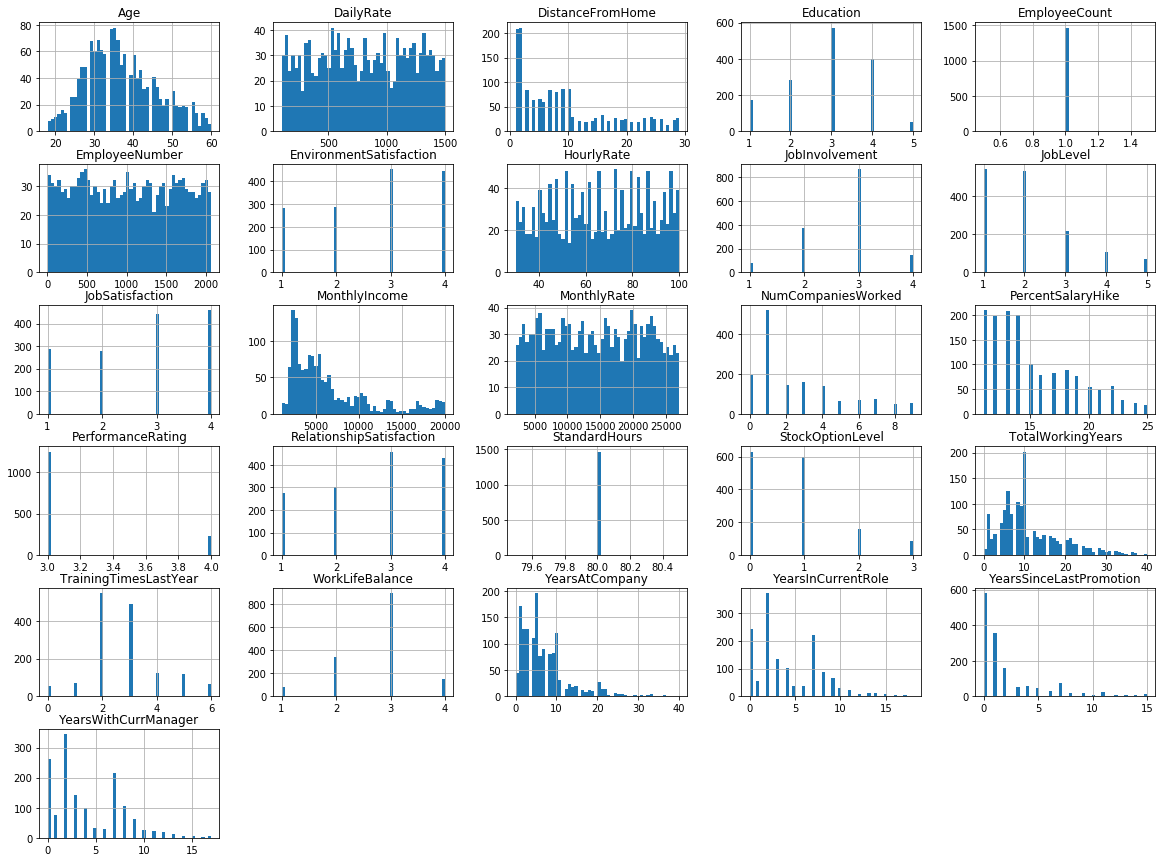

In [11]:
df.hist(bins=50, figsize=(20,15))


Observações sobre os histogramas:
    1. Alguns atributos apresentam escalas bem diferentes. Principalmente MOnthlyIncome e MonthlyRate;
    2. StandardHours e EmployeeCOunt são idênticos para todos os funcionários, não apresentando variação;
    3. Algumas variáveis apresentam cauda longa: TotalWorkingYears; MonthlyIncome; DistancefromHome; Tais características   podem gerar dificuldade adicional em MAchine learning para identificação de padrões, requerento transformação.
    4. Existem algumas variáveis categóricas cujos valores são numéricos. Tais variáveis serão transformadas em dummies, tais quais as demais variáveis categóricas. 
    5. Variável 'Age' apresenta assimetria a direita;

### 3.2.1 Verificando as correlações entre variáveis

In [12]:
# Criando uma base em que variável com nova coluna 'target' com valor numérico para attrition
df1_a = df.copy()
df1_a['Target'] = df1_a['Attrition'].apply(lambda x:0 if x == 'No' else 1)
df1_a

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Target
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7,0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8,0


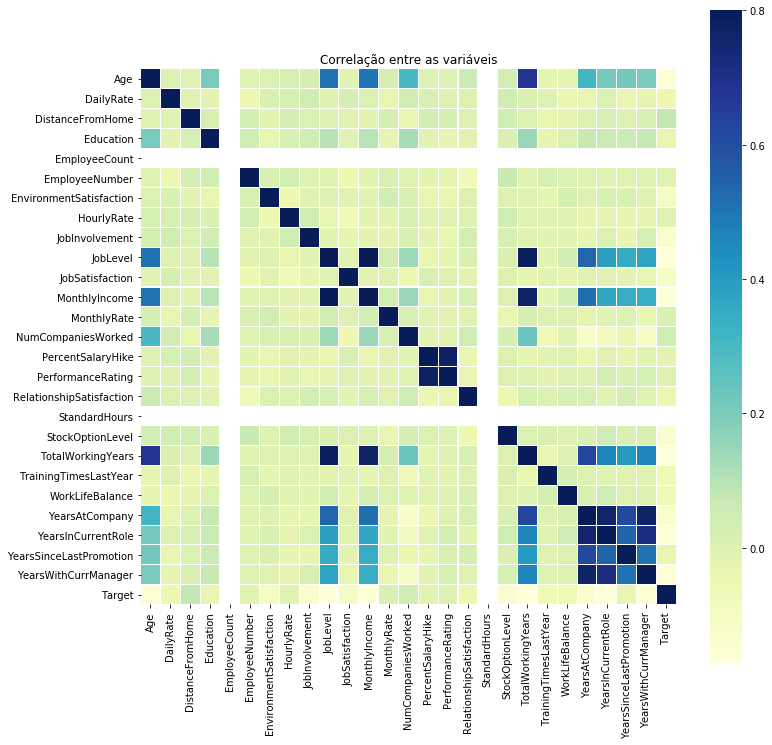

In [13]:
#Usando base com coluna Target = Attrition numérica
corr=df1_a.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=.8, linewidths=0.01,square=True,annot=False,cmap='YlGnBu',linecolor="white")
plt.title('Correlação entre as variáveis');

In [14]:
df1_a.corr()['Target']


Age                        -0.159205
DailyRate                  -0.056652
DistanceFromHome            0.077924
Education                  -0.031373
EmployeeCount                    NaN
EmployeeNumber             -0.010577
EnvironmentSatisfaction    -0.103369
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobLevel                   -0.169105
JobSatisfaction            -0.103481
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StandardHours                    NaN
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
YearsAtCompany             -0.134392
YearsInCurrentRole         -0.160545
YearsSinceLastPromotion    -0.033019
YearsWithCurrManager       -0.156199
Target                      1.000000
N

Conforme apresentado acima as variáveis positivamente correlacionadas com 'Target' ('Attrition') são:
1. Distance From Home (0,077)
2. Number of Companies Worked (0,043)
3. Monthly Rate (0,015)


Enquanto as variáveis abaixo são negativamente correlacionadas:
1. Total Working Years (-0,171)
2. Job Level (-0,169)
3. Years in Current Role (-0,160)
3. Monthy Income (-0,159)
4. Age (-0,159)


#### 3.2.2 Analisando as principais features pelo atributo Target:
#### Age:

Text(0.5, 1.0, 'Gráfico de densidade de idade por desligamento')

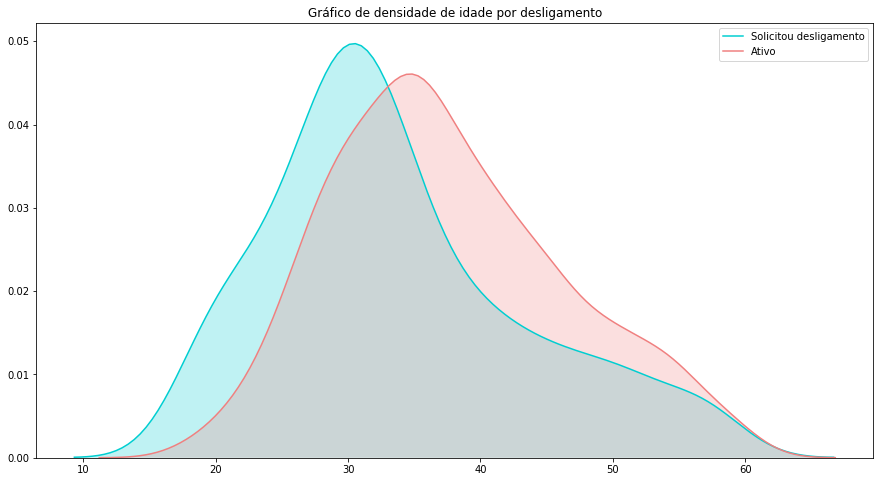

In [15]:
# Age: gerando gráfico de densidade de idade por variável Target
plt.figure(figsize=(15,8))
sns.kdeplot(df1_a['Age'][df1_a.Target == 1], color='darkturquoise', shade = True)
sns.kdeplot(df1_a['Age'][df1_a.Target == 0], color='lightcoral', shade = True)
plt.legend(['Solicitou desligamento', 'Ativo'])
plt.title('Gráfico de densidade de idade por desligamento')


NOta-se que densidade dos empregados desligado é maior em idade inferior.

#### Análise de sexo:
    Nada de relevante apontado, maior taxa de desligamento de homens, corresponde a maior participação de homens na base.

In [16]:
#Taxa de desligamento por sexo = frequencia
df1_a.groupby(['Gender']).Target.value_counts(normalize= True)

Gender  Target
Female  0         0.852041
        1         0.147959
Male    0         0.829932
        1         0.170068
Name: Target, dtype: float64

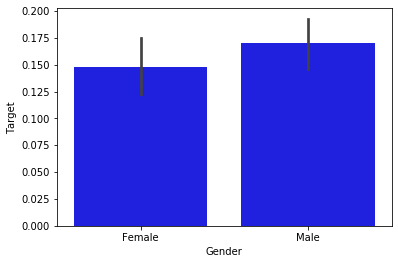

In [17]:
sns.barplot('Gender', 'Target',  data=df1_a, color='blue')
plt.show()

#### Education Field:

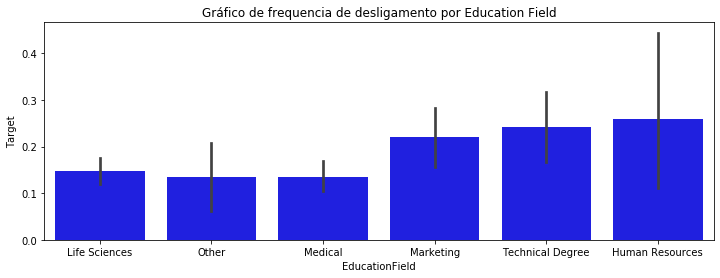

In [18]:
# Frequencia de desligamento por campo de educação:
plt.figure(figsize=(12,4))
sns.barplot('EducationField', 'Target',  data=df1_a, color='blue')
plt.title('Gráfico de frequencia de desligamento por Education Field')

plt.show()

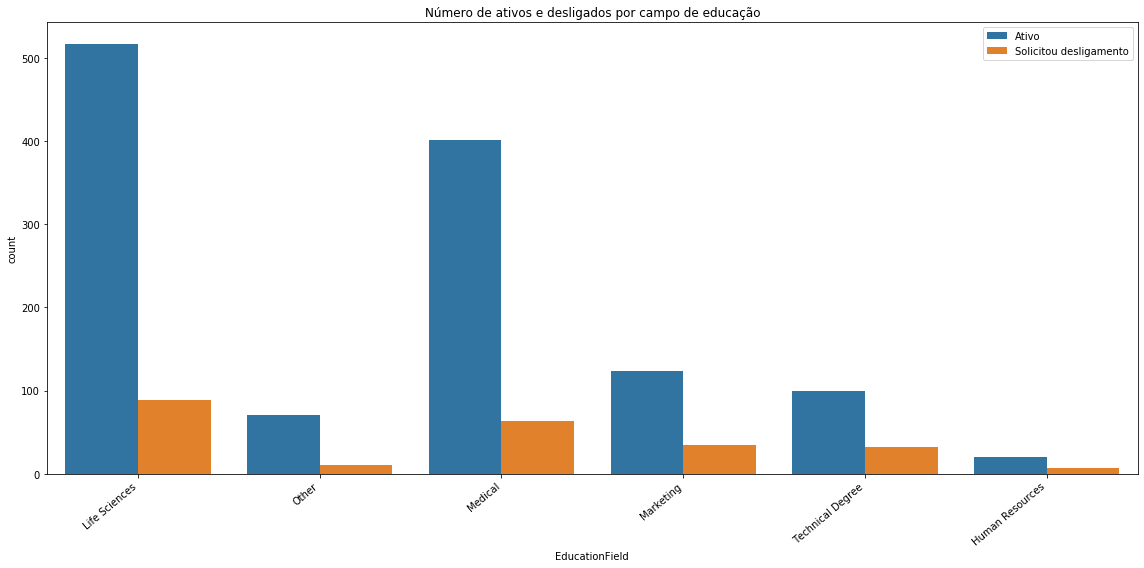

In [19]:
plt.figure(figsize=(16,8))
ax = sns.countplot(data=df1_a, x='EducationField', hue='Target')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title('Número de ativos e desligados por campo de educação')
plt.legend(['Ativo', 'Solicitou desligamento'])
plt.tight_layout()

### Education:

In [20]:
#Taxa de desligamento por Educação
df1_a.groupby(['Education']).Target.value_counts(normalize= True)

Education  Target
1          0         0.817647
           1         0.182353
2          0         0.843972
           1         0.156028
3          0         0.826923
           1         0.173077
4          0         0.854271
           1         0.145729
5          0         0.895833
           1         0.104167
Name: Target, dtype: float64

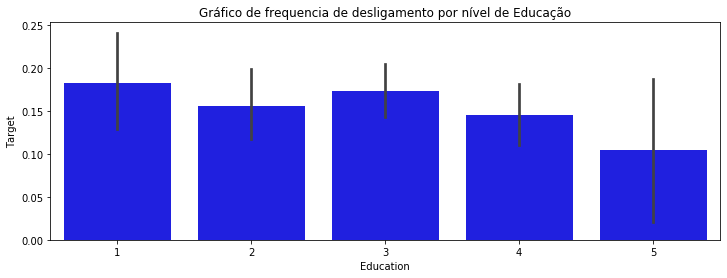

In [21]:
# Frequencia de desligamento por campo de educação:
plt.figure(figsize=(12,4))
sns.barplot('Education', 'Target',  data=df1_a, color='blue')
plt.title('Gráfico de frequencia de desligamento por nível de Educação')

plt.show()

#### Marital Status:

In [22]:
#Taxa de desligamento por estado Civil
df1_a.groupby(['MaritalStatus']).Target.value_counts(normalize= True)

MaritalStatus  Target
Divorced       0         0.899083
               1         0.100917
Married        0         0.875186
               1         0.124814
Single         0         0.744681
               1         0.255319
Name: Target, dtype: float64

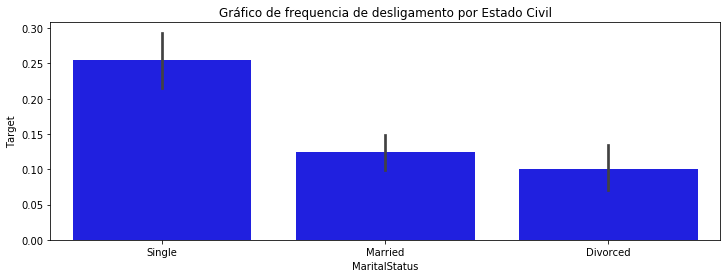

In [23]:
# Frequencia de desligamento por campo de educação:
plt.figure(figsize=(12,4))
sns.barplot('MaritalStatus', 'Target',  data=df1_a, color='blue')
plt.title('Gráfico de frequencia de desligamento por Estado Civil')

plt.show()

#### Distance From Home

Text(0.5, 1.0, 'Gráfico de densidade de distância de casa por desligamento')

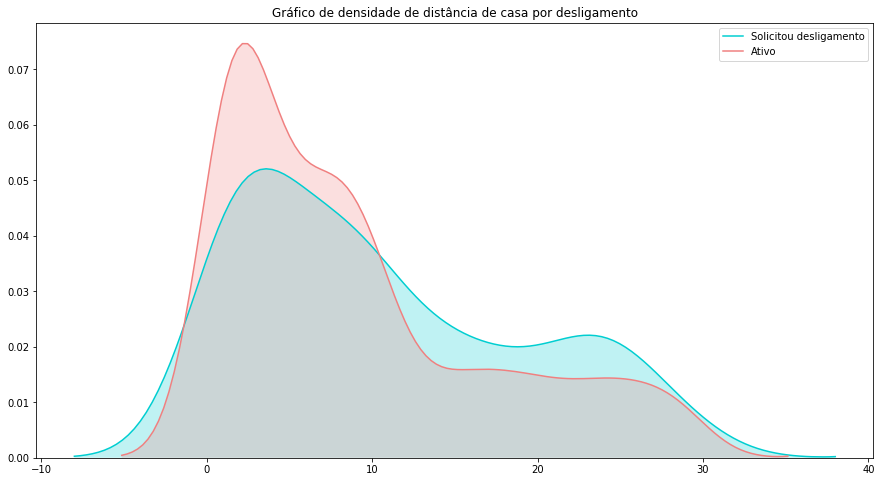

In [24]:
# Distance From Home: gerando gráfico de densidade de distância de casa por variável Target
plt.figure(figsize=(15,8))
sns.kdeplot(df1_a['DistanceFromHome'][df1_a.Target == 1], color='darkturquoise', shade = True)
sns.kdeplot(df1_a['DistanceFromHome'][df1_a.Target == 0], color='lightcoral', shade = True)
plt.legend(['Solicitou desligamento', 'Ativo'])
plt.title('Gráfico de densidade de distância de casa por desligamento')


#### Department

In [25]:
#Taxa de desligamento por departamento
df1_a.groupby(['Gender']).Target.value_counts(normalize= True)

Gender  Target
Female  0         0.852041
        1         0.147959
Male    0         0.829932
        1         0.170068
Name: Target, dtype: float64

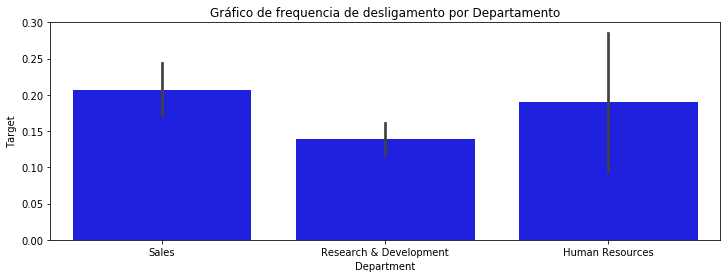

In [26]:
# Frequencia de desligamento por departamento:
plt.figure(figsize=(12,4))
sns.barplot('Department', 'Target',  data=df1_a, color='blue')
plt.title('Gráfico de frequencia de desligamento por Departamento')

plt.show()

#### Business Travel

In [27]:
#Taxa de desligamento por Viagem de Trabalho = frequencia
df1_a.groupby(['BusinessTravel']).Target.value_counts(normalize= True)

BusinessTravel     Target
Non-Travel         0         0.920000
                   1         0.080000
Travel_Frequently  0         0.750903
                   1         0.249097
Travel_Rarely      0         0.850431
                   1         0.149569
Name: Target, dtype: float64

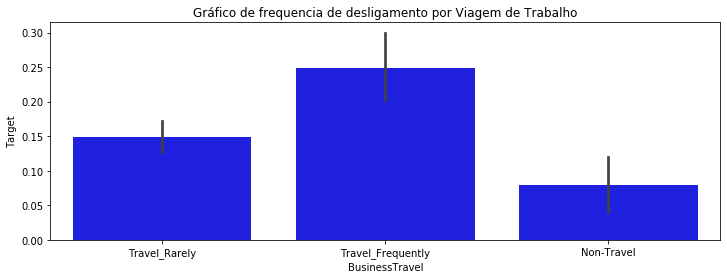

In [28]:
# Frequencia de desligamento por Viagem de Trabalho:
plt.figure(figsize=(12,4))
sns.barplot('BusinessTravel', 'Target',  data=df1_a, color='blue')
plt.title('Gráfico de frequencia de desligamento por Viagem de Trabalho')

plt.show()

#### Job Role:

In [29]:
#Taxa de desligamento por função = frequencia
df1_a.groupby(['JobRole']).Target.value_counts(normalize= True)


JobRole                    Target
Healthcare Representative  0         0.931298
                           1         0.068702
Human Resources            0         0.769231
                           1         0.230769
Laboratory Technician      0         0.760618
                           1         0.239382
Manager                    0         0.950980
                           1         0.049020
Manufacturing Director     0         0.931034
                           1         0.068966
Research Director          0         0.975000
                           1         0.025000
Research Scientist         0         0.839041
                           1         0.160959
Sales Executive            0         0.825153
                           1         0.174847
Sales Representative       0         0.602410
                           1         0.397590
Name: Target, dtype: float64

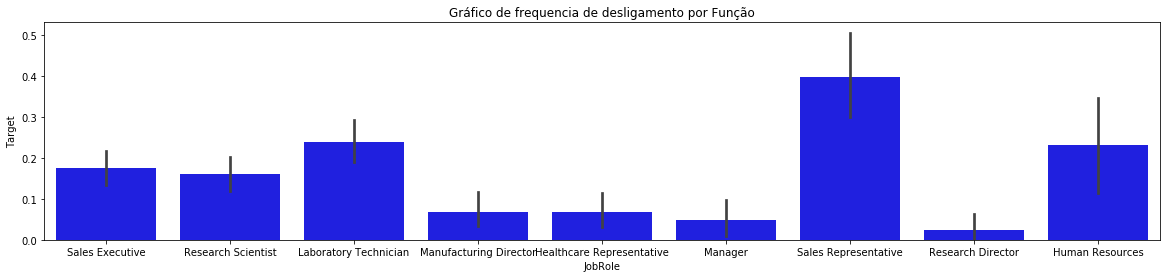

In [30]:
# Frequencia de desligamento por função:
plt.figure(figsize=(20,4))
sns.barplot('JobRole', 'Target',  data=df1_a, color='blue')
plt.title('Gráfico de frequencia de desligamento por Função')

plt.show()

#### Over time:

In [31]:
#Taxa de desligamento por sexo = frequencia
df1_a.groupby(['OverTime']).Target.value_counts(normalize= True)

OverTime  Target
No        0         0.895636
          1         0.104364
Yes       0         0.694712
          1         0.305288
Name: Target, dtype: float64

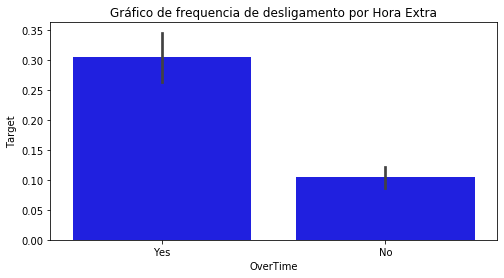

In [32]:
# Frequencia de desligamento por Hora Extra:
plt.figure(figsize=(8,4))
sns.barplot('OverTime', 'Target',  data=df1_a, color='blue')
plt.title('Gráfico de frequencia de desligamento por Hora Extra')

plt.show()

#### Job Involvment:

In [33]:
#Taxa de desligamento por Envolvimento = frequencia
df1_a.groupby(['JobInvolvement']).Target.value_counts(normalize= True)

JobInvolvement  Target
1               0         0.662651
                1         0.337349
2               0         0.810667
                1         0.189333
3               0         0.855991
                1         0.144009
4               0         0.909722
                1         0.090278
Name: Target, dtype: float64

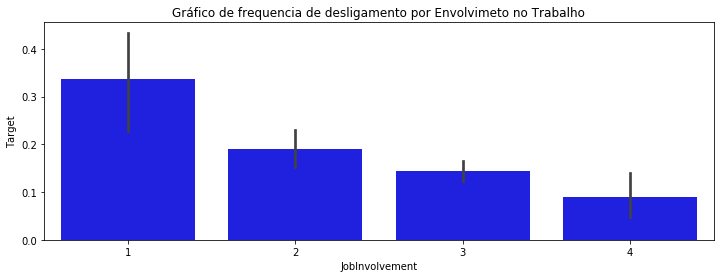

In [34]:
# Frequencia de desligamento por Envolvimento no Trabalho:
plt.figure(figsize=(12,4))
sns.barplot('JobInvolvement', 'Target',  data=df1_a, color='blue')
plt.title('Gráfico de frequencia de desligamento por Envolvimeto no Trabalho')

plt.show()

#### Num Companies Worked:

Text(0.5, 1.0, 'Gráfico de densidade do número de companhias em que trabalhou por desligamento')

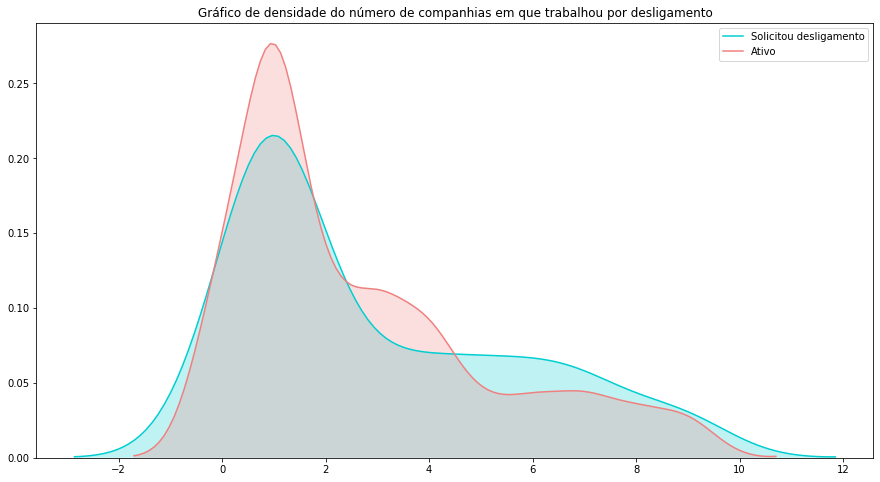

In [35]:
#  Num Companies Worked: gerando gráfico de densidade de número de empresas em que trabalhou por variável Target
plt.figure(figsize=(15,8))
sns.kdeplot(df1_a['NumCompaniesWorked'][df1_a.Target == 1], color='darkturquoise', shade = True)
sns.kdeplot(df1_a['NumCompaniesWorked'][df1_a.Target == 0], color='lightcoral', shade = True)
plt.legend(['Solicitou desligamento', 'Ativo'])
plt.title('Gráfico de densidade do número de companhias em que trabalhou por desligamento')


#### Years at company:

Text(0.5, 1.0, 'Gráfico de densidade de quantidade de anos trabalhados na empresa por desligamento')

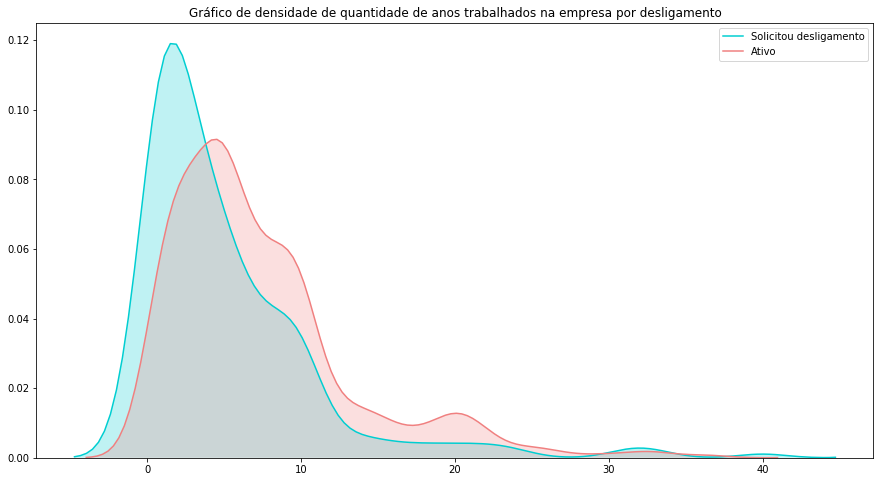

In [36]:
#Years at Company: gerando gráfico de densidade de quantidade de anos trabalhados na empresa por variável Target
plt.figure(figsize=(15,8))
sns.kdeplot(df1_a['YearsAtCompany'][df1_a.Target == 1], color='darkturquoise', shade = True)
sns.kdeplot(df1_a['YearsAtCompany'][df1_a.Target == 0], color='lightcoral', shade = True)
plt.legend(['Solicitou desligamento', 'Ativo'])
plt.title('Gráfico de densidade de quantidade de anos trabalhados na empresa por desligamento')


#### Years in Current Role

Text(0.5, 1.0, 'Gráfico de densidade de número de anos na posição atual por desligamento')

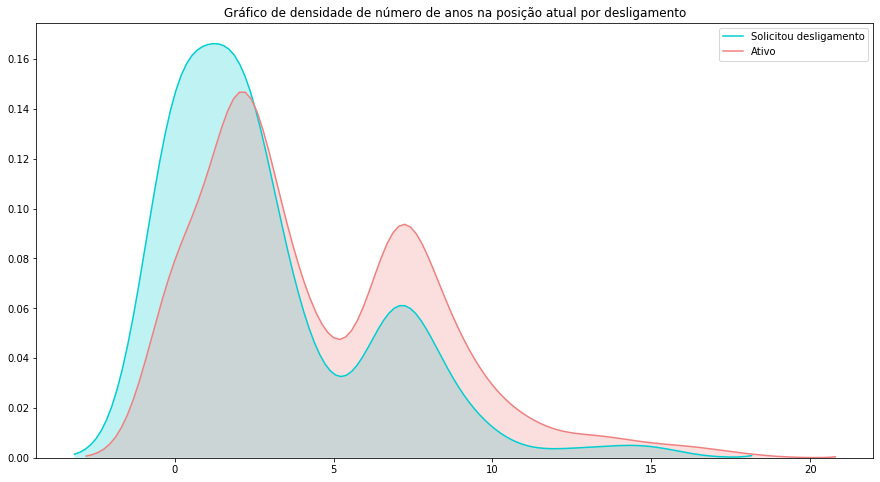

In [37]:
# Years in Current Role: gerando gráfico de densidade de número de anos na posição atual por variável Target
plt.figure(figsize=(15,8))
sns.kdeplot(df1_a['YearsInCurrentRole'][df1_a.Target == 1], color='darkturquoise', shade = True)
sns.kdeplot(df1_a['YearsInCurrentRole'][df1_a.Target == 0], color='lightcoral', shade = True)
plt.legend(['Solicitou desligamento', 'Ativo'])
plt.title('Gráfico de densidade de número de anos na posição atual por desligamento')


#### Years Since Last Promotion:

Text(0.5, 1.0, 'Gráfico de densidade de número de anos desde  última promoção por desligamento')

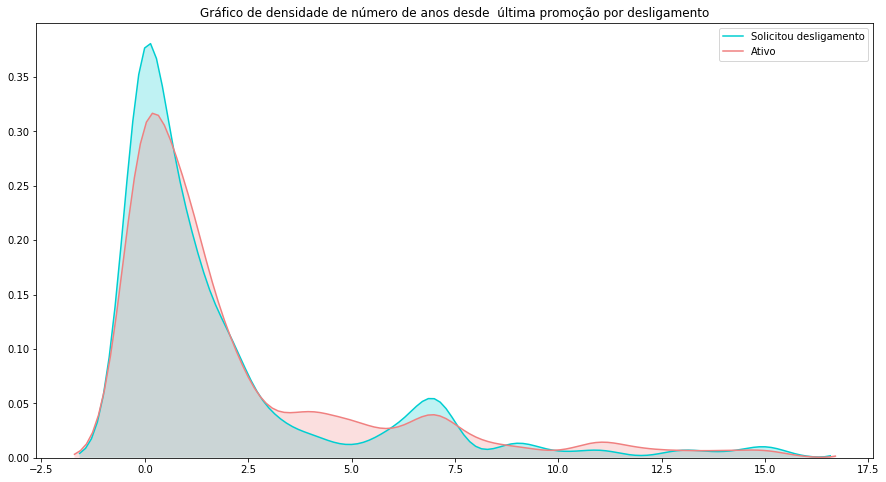

In [38]:
# Years Since Last Promotion: gerando gráfico de número de anos desde  última promoção por variável Target
plt.figure(figsize=(15,8))
sns.kdeplot(df1_a['YearsSinceLastPromotion'][df1_a.Target == 1], color='darkturquoise', shade = True)
sns.kdeplot(df1_a['YearsSinceLastPromotion'][df1_a.Target == 0], color='lightcoral', shade = True)
plt.legend(['Solicitou desligamento', 'Ativo'])
plt.title('Gráfico de densidade de número de anos desde  última promoção por desligamento')


#### Total Working Years

Text(0.5, 1.0, 'Gráfico de densidade de númeor de anos trabalhados por desligamento')

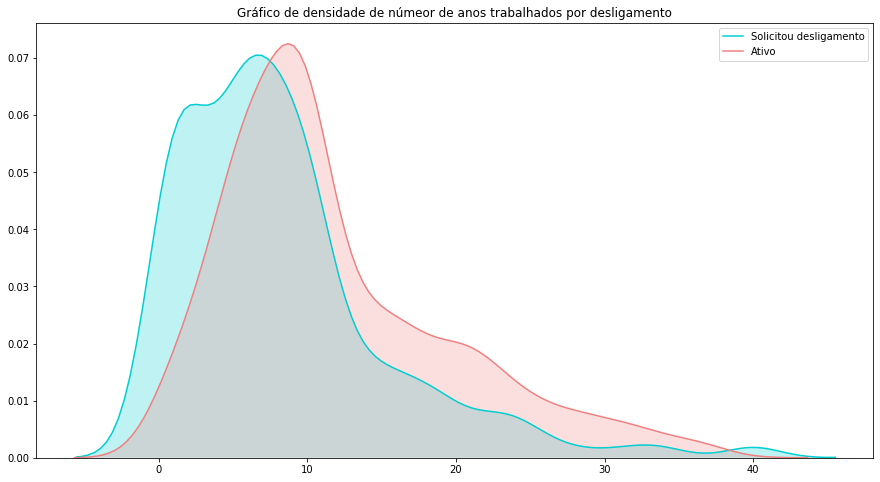

In [39]:
# Total Working Years: gerando gráfico de densidade de número de anos trabalhados por variável Target
plt.figure(figsize=(15,8))
sns.kdeplot(df1_a['TotalWorkingYears'][df1_a.Target == 1], color='darkturquoise', shade = True)
sns.kdeplot(df1_a['TotalWorkingYears'][df1_a.Target == 0], color='lightcoral', shade = True)
plt.legend(['Solicitou desligamento', 'Ativo'])
plt.title('Gráfico de densidade de númeor de anos trabalhados por desligamento')


#### Years with Current Manager 

Text(0.5, 1.0, 'Gráfico de densidade de número de anos com gestor atual por desligamento')

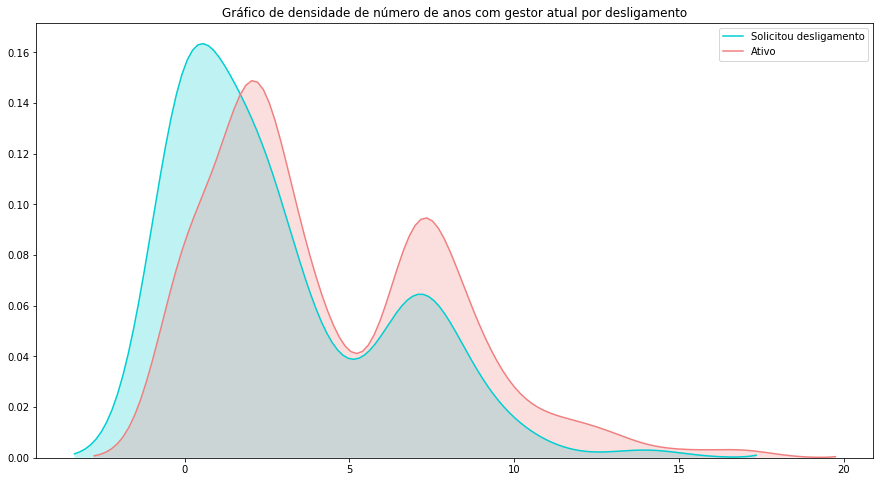

In [40]:
# Years with Current Manager: gerando gráfico de densidade de número de anos com gestor atual por variável Target
plt.figure(figsize=(15,8))
sns.kdeplot(df1_a['YearsWithCurrManager'][df1_a.Target == 1], color='darkturquoise', shade = True)
sns.kdeplot(df1_a['YearsWithCurrManager'][df1_a.Target == 0], color='lightcoral', shade = True)
plt.legend(['Solicitou desligamento', 'Ativo'])
plt.title('Gráfico de densidade de número de anos com gestor atual por desligamento')


#### Work Life Balance:

In [41]:
#Taxa de desligamento por Equilíbrio de vida = frequencia
df1_a.groupby(['WorkLifeBalance']).Target.value_counts(normalize= True)

WorkLifeBalance  Target
1                0         0.687500
                 1         0.312500
2                0         0.831395
                 1         0.168605
3                0         0.857783
                 1         0.142217
4                0         0.823529
                 1         0.176471
Name: Target, dtype: float64

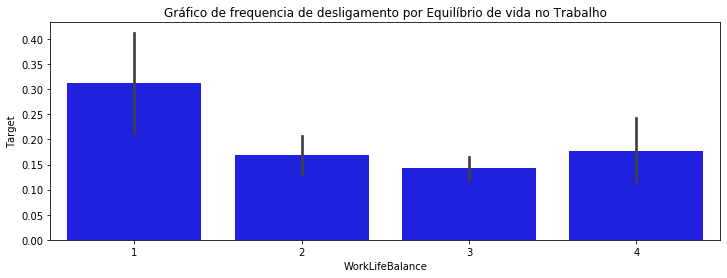

In [42]:
# Frequencia de desligamento por Equilíbrio de vida:
plt.figure(figsize=(12,4))
sns.barplot('WorkLifeBalance', 'Target',  data=df1_a, color='blue')
plt.title('Gráfico de frequencia de desligamento por Equilíbrio de vida no Trabalho')

plt.show()

#### Monthy Rate

Text(0.5, 1.0, 'Gráfico de densidade de taxa mensal por desligamento')

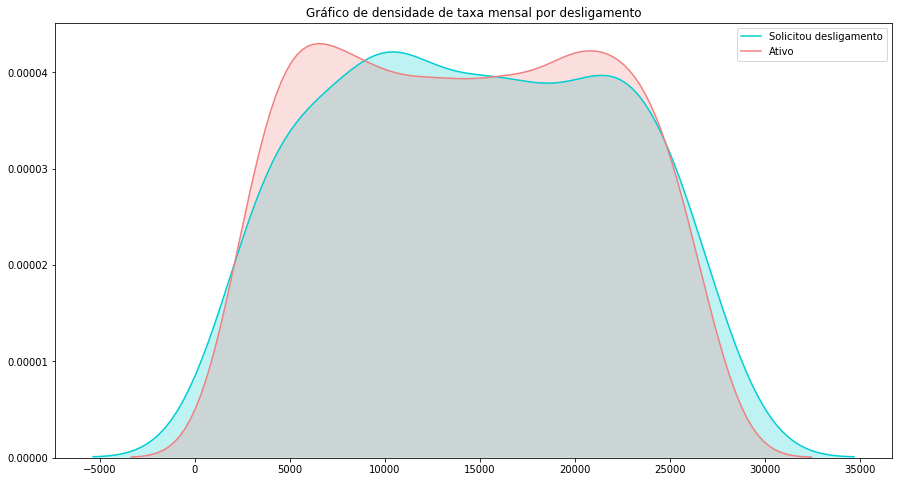

In [43]:
# Monthly Rate: gerando gráfico de densidade de taxa mensal por variável Target
plt.figure(figsize=(15,8))
sns.kdeplot(df1_a['MonthlyRate'][df1_a.Target == 1], color='darkturquoise', shade = True)
sns.kdeplot(df1_a['MonthlyRate'][df1_a.Target == 0], color='lightcoral', shade = True)
plt.legend(['Solicitou desligamento', 'Ativo'])
plt.title('Gráfico de densidade de taxa mensal por desligamento')


#### Monthly Income

Text(0.5, 1.0, 'Gráfico de densidade de renda mensal por desligamento')

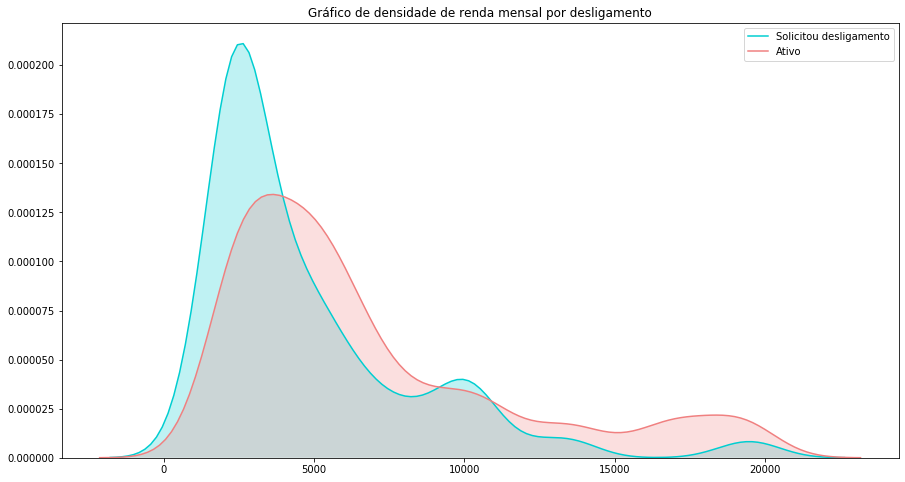

In [44]:
# Monthly Income: gerando gráfico de densidade de renda mensal por variável Target
plt.figure(figsize=(15,8))
sns.kdeplot(df1_a['MonthlyIncome'][df1_a.Target == 1], color='darkturquoise', shade = True)
sns.kdeplot(df1_a['MonthlyIncome'][df1_a.Target == 0], color='lightcoral', shade = True)
plt.legend(['Solicitou desligamento', 'Ativo'])
plt.title('Gráfico de densidade de renda mensal por desligamento')


#### Stock Option Level

In [45]:
#Taxa de desligamento por nível de Stock Option = frequencia
df1_a.groupby(['StockOptionLevel']).Target.value_counts(normalize= True)

StockOptionLevel  Target
0                 0         0.755943
                  1         0.244057
1                 0         0.906040
                  1         0.093960
2                 0         0.924051
                  1         0.075949
3                 0         0.823529
                  1         0.176471
Name: Target, dtype: float64

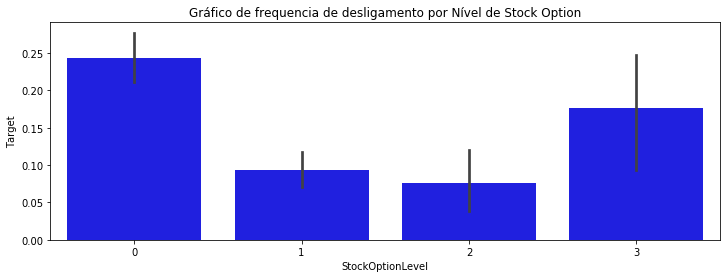

In [46]:
# Frequencia de desligamento por Nível de Stock Option:
plt.figure(figsize=(12,4))
sns.barplot('StockOptionLevel', 'Target',  data=df1_a, color='blue')
plt.title('Gráfico de frequencia de desligamento por Nível de Stock Option')

plt.show()

#### Environment Satisfaction

In [47]:
#Taxa de desligamento por Satisfação = frequencia
df1_a.groupby(['EnvironmentSatisfaction']).Target.value_counts(normalize= True)

EnvironmentSatisfaction  Target
1                        0         0.746479
                         1         0.253521
2                        0         0.850174
                         1         0.149826
3                        0         0.863135
                         1         0.136865
4                        0         0.865471
                         1         0.134529
Name: Target, dtype: float64

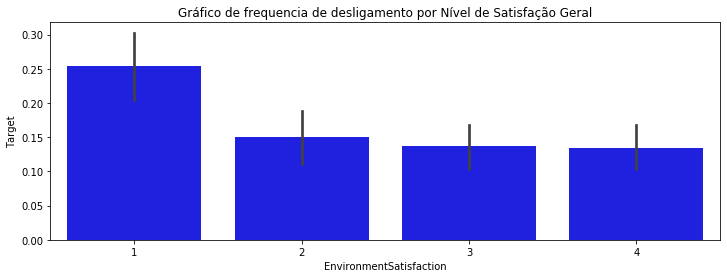

In [48]:
# Frequencia de desligamento por Nível de Satisfação:
plt.figure(figsize=(12,4))
sns.barplot('EnvironmentSatisfaction', 'Target',  data=df1_a, color='blue')
plt.title('Gráfico de frequencia de desligamento por Nível de Satisfação Geral')

plt.show()

#### Job Satisfaction

In [49]:
#Taxa de desligamento por nível de satisfação da função = frequencia
df1_a.groupby(['JobSatisfaction']).Target.value_counts(normalize= True)

JobSatisfaction  Target
1                0         0.771626
                 1         0.228374
2                0         0.835714
                 1         0.164286
3                0         0.834842
                 1         0.165158
4                0         0.886710
                 1         0.113290
Name: Target, dtype: float64

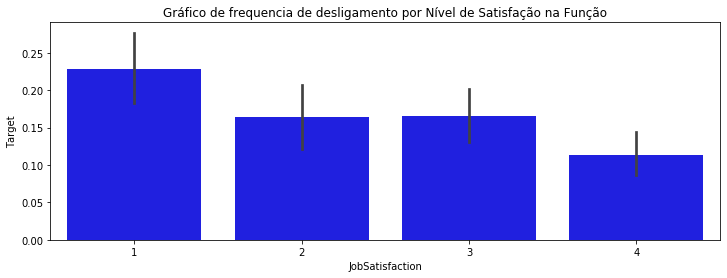

In [50]:
# Frequencia de desligamento por nível de satisfação na função:
plt.figure(figsize=(12,4))
sns.barplot('JobSatisfaction', 'Target',  data=df1_a, color='blue')
plt.title('Gráfico de frequencia de desligamento por Nível de Satisfação na Função')

plt.show()

#### Relationship Satisfaction

In [51]:
#Taxa de desligamento por Nível de Satisfação na relação de trabalho = frequencia
df1_a.groupby(['RelationshipSatisfaction']).Target.value_counts(normalize= True)

RelationshipSatisfaction  Target
1                         0         0.793478
                          1         0.206522
2                         0         0.851485
                          1         0.148515
3                         0         0.845316
                          1         0.154684
4                         0         0.851852
                          1         0.148148
Name: Target, dtype: float64

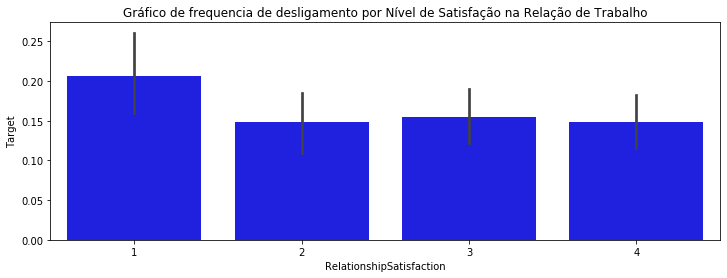

In [52]:
# Frequencia de desligamento por campo de educação:
plt.figure(figsize=(12,4))
sns.barplot('RelationshipSatisfaction', 'Target',  data=df1_a, color='blue')
plt.title('Gráfico de frequencia de desligamento por Nível de Satisfação na Relação de Trabalho')

plt.show()

#### Performance Rating:

In [53]:
#Taxa de desligamento por performance rating = frequencia
df1_a.groupby(['PerformanceRating']).Target.value_counts(normalize= True)

PerformanceRating  Target
3                  0         0.839228
                   1         0.160772
4                  0         0.836283
                   1         0.163717
Name: Target, dtype: float64

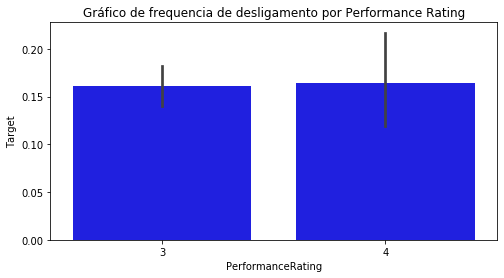

In [54]:
# Frequencia de desligamento por performance rating:
plt.figure(figsize=(8,4))
sns.barplot('PerformanceRating', 'Target',  data=df1_a, color='blue')
plt.title('Gráfico de frequencia de desligamento por Performance Rating')

plt.show()

#### Balanceamento

In [55]:
# Vamos verificar o balanceamento da base de dados:
# Queremos saber quantas vezes 'Attrition' é não, que significa que funcionário não pediu demissão.
print("Número de vezes que valor 'Não' aparece ", str(df[df["Attrition"] == "No"].shape[0]) + ".")

Número de vezes que valor 'Não' aparece  1233.


In [56]:
print("Número de vezes que valor 'Sim' aparece ", str(df[df["Attrition"] == "Yes"].shape[0]) + ".")

Número de vezes que valor 'Sim' aparece  237.


Balanceamento da Base:
    A base não se apresneta balanceada, tendo 16% de 'Attrition' igual a 'Yes' (funcionário pediu demissão).
    Enquanto temos 84% de 'Attrition' igual a 'No'(funcionário não pediu demissão).
    Dessa forma o indicador 'Accuracy' pode não ser o mais indicado para métrica de performance dessa base.

## 4 Preparando os dados e montando o dataframe final

### 4.1 Variáveis numéricas:
Precisamos identificar e trabalhar as variáveis categóricas de forma a poder utilizar a informação no modelo. Pretende-se aqui identificar variáveis categóricas que já apresentam valores numéricos de forma a transformá-las em dummies.

In [57]:
# Fazendo uma lista das variáveis numéricas:
num_vars = [col for col in df.columns if df[col].dtypes != 'O']
num_vars

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [58]:
# Dentro das variáveis numéricas, queremos identificar e separar as variáveis categóricas para posteriormente 
    # dar o mesmo tratamento das demais categóricas cirando dummies.
    
# Aproveita-se para excluir a variável 'EmployeeNumber' que, como mencionado anteriormente,
    #se refere ao número de registro do funcionário, não apresentado informação adicional para a base.

discrete_vars = [var for var in num_vars if len(df[var].unique()) < 10 ]

print('Number of discrete variables: ', len(discrete_vars))
discrete_vars

Number of discrete variables:  12


['Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

### 4.2 Variáveis categóricas:
Precisamos identificar e trabalhar as variáveis categóricas de forma a poder utilizar a informação no modelo. Machine learning pode usar apenas com valores numéricos como variáveis explicativas. Logo é necessário incluir Label numérico.

In [59]:
# criando lista de variáveis categóricas
cat_vars = [col for col in df.columns if df[col].dtypes == 'O']
cat_vars

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [60]:
# Visualizando o head da base de dados apenas com variáveis categóricas
df[cat_vars].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [61]:
# Identificando os itens categóricos por variável:
for col in df[cat_vars].columns:
    print(col, df[col].unique()[:12], '\n')

Attrition ['Yes' 'No'] 

BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

Department ['Sales' 'Research & Development' 'Human Resources'] 

EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 

Gender ['Female' 'Male'] 

JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'] 

MaritalStatus ['Single' 'Married' 'Divorced'] 

Over18 ['Y'] 

OverTime ['Yes' 'No'] 



### 4.3 Seleçao das Features

In [62]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [63]:
# Criação de lista de colunas que serão excluídas por não adionarem informação. 

x_vars=['EmployeeCount','EmployeeNumber','StandardHours','Over18']

In [64]:
# # Excluir variaveis que não adicionam informação ao modelo: EmployeeCount / EmployeeNumber / StandarHours / Over18
# Foi excluída também a variável 'Attrition' que é a variável dependente que queremos prever (Y).

df2 = df.drop(x_vars,axis = 1)
df2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [65]:
df2.shape

(1470, 31)

In [66]:
# Criando uma base em que variável com nova coluna 'target' com valor numérico para attrition
df2_a = df2.copy()
df2_a['Target'] = df2_a['Attrition'].apply(lambda x:0 if x == 'No' else 1)
df2_a

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Target
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7,0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8,0


Retiramos 4 colunas da base que não adicionam informação relevante e 1 coluna referente ao nosso Y. Não houve exclusão de linhas pois cada linha se refere a um funcionário diferente e apresenta informação relevante para a base.

### 4.4 Criando a base final e dividindo em teste e treino
Montaremos a base final df3.
Tal base será criada a partir da lista de variáveis categóricas criadas anteriormente (cat_vars), porém tomando cuidado de excluir as colunas presentes em x_vars (variáveis de exclusão).
O mesmo será feito para as variáveis categóricas em formato numérico (discrete_vars), que excluindo as variáveis sem valor (x_vars), gera new_discrete_vars.
Combinando new_cat-vars  com new_discrete_vars, temos nova_cat_vars, que será transformada para termos os dummies das categóricas e excluiremos a primeira coluna de forma a não termos multicolinearidade.

In [67]:
# pega o que esta em cat vars e não foi incluido em x-vars (exclusao)
new_cat_vars = [t for t in cat_vars if t not in x_vars]

In [68]:
new_discrete_vars = [t for t in discrete_vars if t not in x_vars]

In [69]:
# Categoricas = discretas + categoricas
nova_cat_vars = new_discrete_vars + new_cat_vars

In [70]:
df3 = pd.get_dummies(df2, columns=nova_cat_vars, drop_first=True)

In [71]:
df3

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Education_2,Education_3,Education_4,Education_5,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,PerformanceRating_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,94,5993,19479,8,11,8,6,4,0,5,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,61,5130,24907,1,23,10,10,7,1,7,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,92,2090,2396,6,15,7,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,56,2909,23159,1,11,8,8,7,3,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,40,3468,16632,9,12,6,2,2,2,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,41,2571,12290,4,17,17,5,2,0,3,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1466,39,613,6,42,9991,21457,4,15,9,7,7,1,7,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1467,27,155,4,87,6142,5174,1,20,6,6,2,0,3,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1468,49,1023,2,63,5390,13243,2,14,17,9,6,0,8,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [72]:
df3.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Education_2',
       'Education_3', 'Education_4', 'Education_5',
       'EnvironmentSatisfaction_2', 'EnvironmentSatisfaction_3',
       'EnvironmentSatisfaction_4', 'JobInvolvement_2', 'JobInvolvement_3',
       'JobInvolvement_4', 'JobLevel_2', 'JobLevel_3', 'JobLevel_4',
       'JobLevel_5', 'JobSatisfaction_2', 'JobSatisfaction_3',
       'JobSatisfaction_4', 'PerformanceRating_4',
       'RelationshipSatisfaction_2', 'RelationshipSatisfaction_3',
       'RelationshipSatisfaction_4', 'StockOptionLevel_1',
       'StockOptionLevel_2', 'StockOptionLevel_3', 'TrainingTimesLastYear_1',
       'TrainingTimesLastYear_2', 'TrainingTimesLastYear_3',
       'TrainingTimesLastYear_4', 'TrainingTimesLastYear_5',
       'Traini

In [73]:
df3.shape

(1470, 68)

Analisando o dataframe acima verificamos que as informações estão de acordo. Categóricas foram transformadas em dummies e demais variáveis numéricas estão todas presentes. Não houve alteração no número de linhas.
A base está pronta para ser dividida em treino e teste.
Usaremos o fator de 20% para a divisão.

In [74]:
# Normalizando as variáveis em intervalo de 0 a 5
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

df3_a = pd.DataFrame(index=df3.index)
for col in df3.columns:
    df3_a[col] = df3[col].astype(float)
    df3_a[[col]] = scaler.fit_transform(df3_a[[col]])
df3_a


,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Education_2,Education_3,Education_4,Education_5,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,PerformanceRating_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,TrainingTimesLastYear_1,TrainingTimesLastYear_2,TrainingTimesLastYear_3,TrainingTimesLastYear_4,TrainingTimesLastYear_5,TrainingTimesLastYear_6,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.547619,0.715820,0.000000,0.914286,0.262454,0.698053,0.888889,0.000000,0.200,0.150,0.222222,0.000000,0.294118,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.738095,0.126700,0.250000,0.442857,0.217009,0.916001,0.111111,0.857143,0.250,0.250,0.388889,0.066667,0.411765,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.452381,0.909807,0.035714,0.885714,0.056925,0.012126,0.666667,0.285714,0.175,0.000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.357143,0.923407,0.071429,0.371429,0.100053,0.845814,0.111111,0.000000,0.200,0.200,0.388889,0.200000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.214286,0.350036,0.035714,0.142857,0.129489,0.583738,1.000000,0.071429,0.150,0.050,0.111111,0.133333,0.117647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,0.157143,0.082254,0.409396,0.444444,0.428571,0.425,0.125,0.111111,0.000000,0.176471,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1466,0.500000,0.365784,0.178571,0.171429,0.472986,0.777474,0.444444,0.285714,0.225,0.175,0.388889,0.066667,0.411765,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1467,0.214286,0.03793

### 4.5 Dividindo a Base em teste e Treino:

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
df_x = df3_a.drop('Attrition_Yes',axis = 1) 
X = df_x # Selects the features
y = df3_a['Attrition_Yes'] # Selects the variable we want to predict - ok porque no teve exclusao de linhas

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
y_train.shape

(1176,)

In [78]:
# % 0 dentro de treino
y_train[y_train==0].shape[0] / y_train.shape[0]

0.8316326530612245

In [79]:
# % 0 dentro de teste
y_test[y_test==0].shape[0] / y_test.shape[0]

0.8673469387755102

In [80]:
y_train

1097    0.0
727     0.0
254     0.0
1175    0.0
1341    0.0
       ... 
1130    0.0
1294    0.0
860     1.0
1459    0.0
1126    0.0
Name: Attrition_Yes, Length: 1176, dtype: float64

## 5 Selecionando modelo: 

### 5.1 Regressão Logistica

In [81]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

In [82]:
# instantiate the object LogisticRegression(). Fix random state to be 1
logistic = LogisticRegression(random_state=42)

In [83]:
# train the model
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
# Use the trained model to make predictions for the test set
logistic_pred = logistic.predict(X_test)

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

In [86]:
# Relatório de medidas de performance base treino
logistic_train = logistic.predict(X_train)
print(classification_report(y_train, logistic_train))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94       978
         1.0       0.85      0.53      0.65       198

    accuracy                           0.90      1176
   macro avg       0.88      0.75      0.80      1176
weighted avg       0.90      0.90      0.90      1176



In [87]:
# Creates a report with the performance metrics for our decision tree model
print(classification_report(y_test, logistic_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94       255
         1.0       0.64      0.41      0.50        39

    accuracy                           0.89       294
   macro avg       0.78      0.69      0.72       294
weighted avg       0.88      0.89      0.88       294



In [88]:
# 
print(confusion_matrix(y_test, logistic_pred))

[[246   9]
 [ 23  16]]


Fileiras: No , Yes
Colunas: Previu No, Previu Yes

In [89]:
def plot_confusion_matrix1(cm, classes,
                          title='Matriz de Confusão - Regressão Logística',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    #plt.figsize(10,10)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')

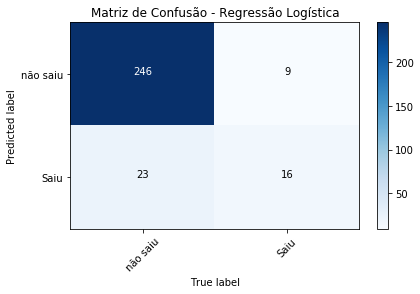

In [90]:
cm = confusion_matrix(y_test, logistic_pred)
plot_confusion_matrix1(cm, ['não saiu','Saiu'])

In [91]:
y.iloc[y_test.index].values

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0.

In [92]:
logistic_pred

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0.

In [93]:
# Identificando as probabilidades nas previsões:
probs = logistic.predict_proba(X_test)[:,1]
probs

array([8.54101657e-02, 1.80110555e-03, 3.66194009e-01, 8.90087784e-03,
       3.57428971e-02, 4.38862737e-01, 5.53015819e-01, 6.10995678e-02,
       1.19993258e-01, 2.96289857e-02, 5.88670284e-01, 1.86692996e-01,
       5.67365805e-02, 7.64068826e-02, 9.16162118e-02, 1.69032670e-01,
       3.93868798e-01, 1.04756904e-01, 1.87563742e-01, 1.85365756e-02,
       5.79418428e-01, 4.17633893e-03, 1.58421695e-02, 1.34271792e-01,
       8.77784691e-02, 9.88391266e-03, 7.55027666e-02, 1.41747090e-02,
       8.73011383e-02, 1.04903558e-02, 4.28972738e-03, 1.79131337e-03,
       1.14452560e-03, 9.00020674e-02, 2.87118139e-01, 1.18709727e-02,
       1.10281058e-03, 2.13716743e-01, 8.53837389e-01, 9.90510169e-03,
       5.35629220e-02, 1.96271847e-01, 1.26286990e-02, 5.72496943e-02,
       7.31393957e-01, 8.46041170e-03, 8.62063980e-01, 4.33815742e-01,
       5.54969787e-01, 5.36021922e-01, 1.32553581e-02, 1.45558488e-01,
       5.15504971e-02, 1.25038153e-01, 1.14140377e-01, 6.80759885e-02,
      

In [94]:
np.where(probs>=0.5,1,0)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [95]:
#### Identificando matrizes de confusão por diferentes Thresholds

In [96]:
np.arange(0, 1.1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Analisando Threshold da Regressão Logística para verificar se 0.5 é o melhor fator para segregação dos valores previstos entre ) e 1. 
Através dos dados apresentados abaixo, de fato o fator 0.5 é melhor para previsão, gerando matrzi de confusão com melhor performance.

In [97]:
for t in np.arange(0, 1.1, 0.025):
    print("threshold:", t)
    print(confusion_matrix(y_test, np.where(probs>t, 1, 0)))


threshold: 0.0
[[  0 255]
 [  0  39]]
threshold: 0.025
[[ 90 165]
 [  3  36]]
threshold: 0.05
[[123 132]
 [  4  35]]
threshold: 0.07500000000000001
[[140 115]
 [  4  35]]
threshold: 0.1
[[164  91]
 [  6  33]]
threshold: 0.125
[[177  78]
 [  8  31]]
threshold: 0.15000000000000002
[[188  67]
 [  9  30]]
threshold: 0.17500000000000002
[[196  59]
 [ 10  29]]
threshold: 0.2
[[204  51]
 [ 12  27]]
threshold: 0.225
[[210  45]
 [ 14  25]]
threshold: 0.25
[[215  40]
 [ 15  24]]
threshold: 0.275
[[221  34]
 [ 15  24]]
threshold: 0.30000000000000004
[[224  31]
 [ 17  22]]
threshold: 0.325
[[226  29]
 [ 17  22]]
threshold: 0.35000000000000003
[[228  27]
 [ 18  21]]
threshold: 0.375
[[231  24]
 [ 20  19]]
threshold: 0.4
[[235  20]
 [ 21  18]]
threshold: 0.42500000000000004
[[238  17]
 [ 21  18]]
threshold: 0.45
[[241  14]
 [ 22  17]]
threshold: 0.47500000000000003
[[245  10]
 [ 22  17]]
threshold: 0.5
[[246   9]
 [ 23  16]]
threshold: 0.525
[[247   8]
 [ 25  14]]
threshold: 0.55
[[249   6]
 [ 27  1

In [98]:
#### Calculando área abaixo da curva ROC e plotando a curva ROC:

In [99]:
from sklearn.metrics import roc_curve, roc_auc_score

In [100]:
roc_auc_score(y_test, logistic_pred)

0.6874811463046756

In [101]:
fpr, tpr, thr = roc_curve(y_test, probs) # false positve rate ; true positive rate ,  thresold

Text(0.5, 1.0, 'ROC - Receiver Operating Characteristic')

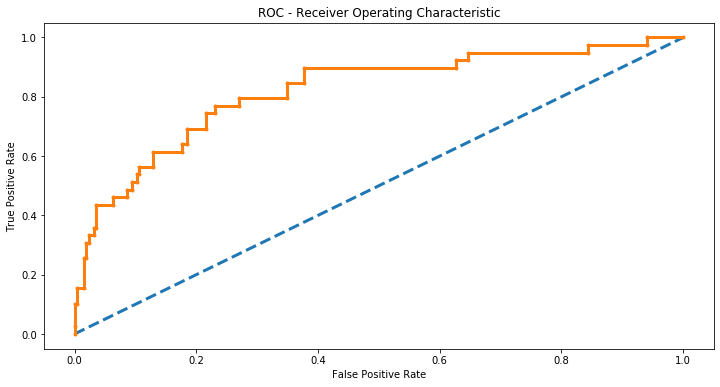

In [102]:
plt.figure(figsize=(12,6))
plt.plot([0,1], [0,1], lw=3, linestyle="--")
plt.plot(fpr, tpr, lw=3, marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - Receiver Operating Characteristic")


### 5.2 Árvore de Decisão

In [103]:
# Importando Decision Tree do sklearn
from sklearn.tree import DecisionTreeClassifier


In [104]:
# Decision tree
dt = DecisionTreeClassifier(random_state=42)

In [105]:
# Treinando o modelo de Decision Tree
dt.fit(X_train, y_train),

(DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=42, splitter='best'),)

In [106]:
# Usando o modelo treinado para fazer previsões para a base de teste:
dt_pred = dt.predict(X_test)

In [107]:
# Relatório de medidas de performance base treino
dt_train = dt.predict(X_train)
print(classification_report(y_train, dt_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       978
         1.0       1.00      1.00      1.00       198

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



In [108]:
# Cria relatório de métricas de performance para o modelo de Decision Tree
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88       255
         1.0       0.26      0.31      0.28        39

    accuracy                           0.79       294
   macro avg       0.58      0.59      0.58       294
weighted avg       0.81      0.79      0.80       294



Na Decision Tree os resultados foram piores que da Regressão Logística. Com recall de 0.31 contrar 0.41 da Regressão logística.

In [109]:
from sklearn.metrics import precision_score 

In [110]:
# Gera matriz de confusão para modelo de Decision Tree
print(confusion_matrix(y_test, dt_pred))

[[221  34]
 [ 27  12]]


In [111]:
# Cria relatório de métricas de performance para o modelo de Decision Tree
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88       255
         1.0       0.26      0.31      0.28        39

    accuracy                           0.79       294
   macro avg       0.58      0.59      0.58       294
weighted avg       0.81      0.79      0.80       294



In [112]:
# Gera matriz de confusão para modelo de Decision Tree
print(confusion_matrix(y_test, dt_pred))

[[221  34]
 [ 27  12]]


In [113]:
def plot_confusion_matrix2(cm, classes,
                          title='Matriz de Confusão - Decision Tree',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    #plt.figsize(10,10)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')

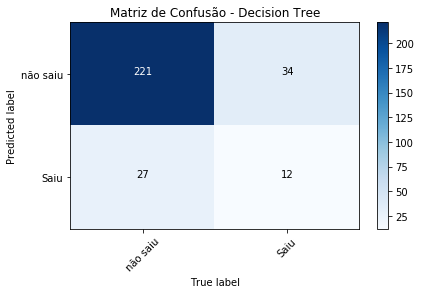

In [114]:
cm = confusion_matrix(y_test, dt_pred)
plot_confusion_matrix2(cm, ['não saiu','Saiu'])

In [116]:
dt_probs = dt.predict_proba(X_test)[:,1]
dt_probs

array([0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0.

In [117]:
dt_probs.shape

(294,)

In [118]:
# Avaliando thresholds para decision tree. 
for t in np.arange(0, 1.1, 0.025):
    print("threshold:", t)
    print(confusion_matrix(y_test, np.where(dt_probs>t, 1, 0)))

threshold: 0.0
[[221  34]
 [ 27  12]]
threshold: 0.025
[[221  34]
 [ 27  12]]
threshold: 0.05
[[221  34]
 [ 27  12]]
threshold: 0.07500000000000001
[[221  34]
 [ 27  12]]
threshold: 0.1
[[221  34]
 [ 27  12]]
threshold: 0.125
[[221  34]
 [ 27  12]]
threshold: 0.15000000000000002
[[221  34]
 [ 27  12]]
threshold: 0.17500000000000002
[[221  34]
 [ 27  12]]
threshold: 0.2
[[221  34]
 [ 27  12]]
threshold: 0.225
[[221  34]
 [ 27  12]]
threshold: 0.25
[[221  34]
 [ 27  12]]
threshold: 0.275
[[221  34]
 [ 27  12]]
threshold: 0.30000000000000004
[[221  34]
 [ 27  12]]
threshold: 0.325
[[221  34]
 [ 27  12]]
threshold: 0.35000000000000003
[[221  34]
 [ 27  12]]
threshold: 0.375
[[221  34]
 [ 27  12]]
threshold: 0.4
[[221  34]
 [ 27  12]]
threshold: 0.42500000000000004
[[221  34]
 [ 27  12]]
threshold: 0.45
[[221  34]
 [ 27  12]]
threshold: 0.47500000000000003
[[221  34]
 [ 27  12]]
threshold: 0.5
[[221  34]
 [ 27  12]]
threshold: 0.525
[[221  34]
 [ 27  12]]
threshold: 0.55
[[221  34]
 [ 27  1

In [119]:
# identificando False positive rate, True Positive Rate para posterior plotagem:
dt_fpr, dt_tpr, dt_thr = roc_curve(y_test, dt_probs) 

In [120]:
dt_fpr.shape

(3,)

In [121]:
dt_tpr.shape

(3,)

Text(0.5, 1.0, 'ROC - Receiver Operating Characteristic')

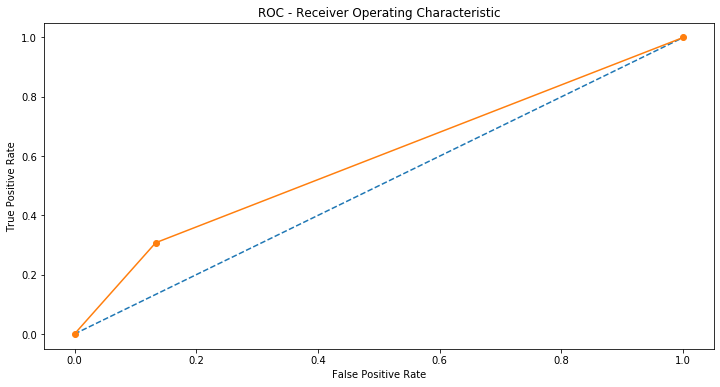

In [122]:
plt.figure(figsize=(12,6))
plt.plot([0,1], [0,1], linestyle="--")
plt.plot(dt_fpr, dt_tpr, marker="o")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - Receiver Operating Characteristic")


### 5.3 Random Forest

In [123]:
# Importando Random Forest do sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [124]:
# Random Forest
rf = RandomForestClassifier( random_state=42)

In [125]:
#  Treinando o modelo de Random Forest
rf.fit(X_train, y_train),

(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),)

In [126]:
# Usando o modelo treinado para fazer previsões para a base de teste:
rf_pred = rf.predict(X_test)

In [127]:
# Cria relatório de métricas de performance para o modelo de Random Forest
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       255
         1.0       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294



Random Forest apresentou acurácia boa, porém Recall muito baixo, classificando todas como 0. Recall de 8% representa qualidade inferior a 16% que é a participação de 1 na base.

In [128]:
# Rodando na base de treina para mostrar overfitting
# Modelo gerando overfitting - funciona bem na amostra, mas fora da amostra (acima - apresenta baixas medidas de performance) 
rf_train = rf.predict(X_train)
print(classification_report(y_train, rf_train))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       978
         1.0       1.00      1.00      1.00       198

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



In [129]:
# Gera matriz de confusão para modelo de Radom Forest
print(confusion_matrix(y_test, rf_pred))

[[254   1]
 [ 36   3]]


In [130]:
from sklearn.model_selection import cross_val_predict

In [131]:
def plot_confusion_matrix3(cm, classes,
                          title='Matriz de Confusão - Random Forest',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    #plt.figsize(10,10)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')

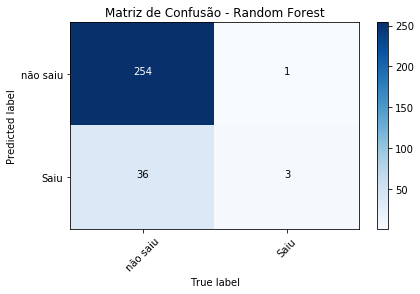

In [132]:
cm = confusion_matrix(y_test, rf_pred)
plot_confusion_matrix3(cm, ['não saiu','Saiu'])

### 5.4 Análise de medidas de performance

In [133]:
# false positve rate ; true positive rate ,  thresold
probs = logistic.predict_proba(X_test)[:,1]
fpr, tpr, thr = roc_curve(y_test, probs) 

In [134]:
# false positve rate ; true positive rate ,  thresold
dt_probs = dt.predict_proba(X_test)[:,1]
dt_fpr, dt_tpr, dt_thr = roc_curve(y_test, dt_probs) 

In [135]:
# false positve rate ; true positive rate ,  thresold
rf_probs = rf.predict_proba(X_test)[:,1]
rf_fpr, rf_tpr, rf_thr = roc_curve(y_test, rf_probs) 

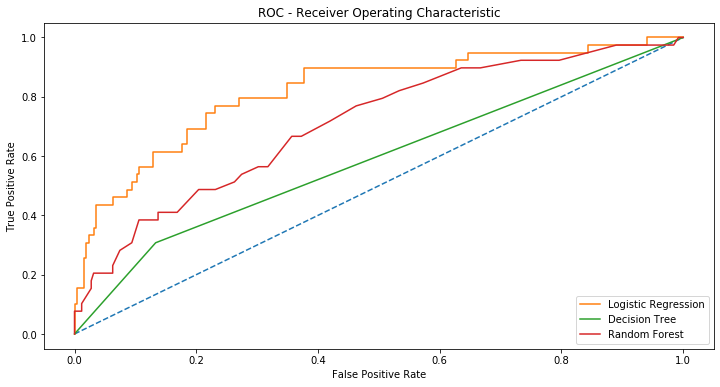

In [136]:
plt.figure(figsize=(12,6))
plt.plot([0,1], [0,1], linestyle="--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.plot(dt_fpr, dt_tpr, label = "Decision Tree")
plt.plot(rf_fpr, rf_tpr, label = "Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - Receiver Operating Characteristic")
plt.legend(loc="lower right")


Problema identificado: porque Random forest está acima de decision tree no gráfico, mas AUROC é inferior (RF = 0,53 x DT = 0,58).

In [137]:
# Indicadores de performance regressão logistica
print(classification_report(y_test, logistic_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94       255
         1.0       0.64      0.41      0.50        39

    accuracy                           0.89       294
   macro avg       0.78      0.69      0.72       294
weighted avg       0.88      0.89      0.88       294



In [138]:
# Indicadores de performance decision tree
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88       255
         1.0       0.26      0.31      0.28        39

    accuracy                           0.79       294
   macro avg       0.58      0.59      0.58       294
weighted avg       0.81      0.79      0.80       294



In [139]:
# Indicadores de performance random forest
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       255
         1.0       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294



In [140]:
from sklearn.metrics import roc_auc_score
auroc = roc_auc_score(y_test, logistic_pred)
print('Para Regressão Logística AUROC score é {} '.format(auroc))

Para Regressão Logística AUROC score é 0.6874811463046756 


In [141]:
from sklearn.metrics import roc_auc_score
dt_auroc = roc_auc_score(y_test, dt_pred)
print('Para Decision Tree AUROC score é {} '.format(dt_auroc))

Para Decision Tree AUROC score é 0.5871794871794872 


In [142]:
from sklearn.metrics import roc_auc_score
rf_auroc = roc_auc_score(y_test, rf_pred)
print('Para Random Forest Tree AUROC score é {} '.format(rf_auroc))

Para Random Forest Tree AUROC score é 0.536500754147813 


Os 3 modelos base em geral não apresentam boa performance. Contudo, o melhor modelo foi a regressão logística, que apresentou coeficientes mais regulares, principalmente no que identifica itens '1', nossa variável de interesse. Todas as medidas para o item '1' ficaram melhor que os outros algoritmos.
Estamos interessados na previsão de 1, sendo que quantidade de false negative é elevado para todos os modelos. COntudo na Regressão logística 41% de 1 foram previstos corretamente, 1,5 vezes melhor que aleatoriedade; pois na base temos 16% de 1.
Em relação à ROC, a regressão logística também apresentou melhor desempenho com área abaixo da curva ROC de 0,687, consideravelmente superior ao modelo de Decision Tree e Random Forest. 

### 5.5 Otimizando os modelos e comparação de medidas de preformance

In [143]:
# Otimizando Algoritmo da Regressão Logística

In [146]:
from sklearn.model_selection import GridSearchCV


In [147]:
param_grid_lr = [{'penalty': ['l1', 'l2']},  
             {'class_weight': ['balanced']},  {'solver': ['liblinear', 'newton-cg']}]

logistic_reg = LogisticRegression(random_state=42)
grid_search_lr = GridSearchCV(logistic_reg, param_grid_lr, cv=5,
                           scoring='roc_auc', return_train_score=True)
grid_search_lr.fit(X_train, y_train)

C:\Users\Juliana\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'penalty': ['l1', 'l2']},
                         {'class_weight': ['balanced']},
                         {'solver': ['liblinear', 'newton-cg']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [148]:
# Melhores hiperparamêtros identificados
grid_search_lr.best_params_

{'solver': 'liblinear'}

In [149]:
# Aplicação dos hiperparâmetros identificaos:
lr_opt = LogisticRegression(solver = 'liblinear', random_state=42).fit(X_train, y_train)


In [150]:
lr_opt.fit(X_train, y_train),


(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),)

In [151]:
lr_opt_pred = lr_opt.predict(X_test)


In [152]:
print(classification_report(y_test, lr_opt_pred))


              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94       255
         1.0       0.64      0.41      0.50        39

    accuracy                           0.89       294
   macro avg       0.78      0.69      0.72       294
weighted avg       0.88      0.89      0.88       294



Regressão Logística não apresentou melhoria em relação ao modelo base.

In [153]:
from sklearn.metrics import roc_auc_score
lr_opt_auroc = roc_auc_score(y_test, lr_opt_pred)
print('Para Regressão Logística Otimizada AUROC score é {} '.format(lr_opt_auroc))

Para Regressão Logística Otimizada AUROC score é 0.6874811463046756 


In [154]:
# Otimizando Algoritmo de Random Forest

Analisando os melhores hiperparâmetros para o algoritmo.
n_estimators: Número de árvores
max_features: Número de variáveis consideradas a cada rodada

In [155]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [20, 25, 30, 35, 40, 45]},
     # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [10, 30], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='roc_auc', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [156]:
grid_search.best_params_

{'max_features': 35, 'n_estimators': 30}

In [157]:
#Testando fora da amostra
rf_opt = RandomForestClassifier(n_estimators = 30, max_features = 35, random_state=42).fit(X_train, y_train)


In [158]:
rf_opt.fit(X_train, y_train),



(RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features=35,
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=30,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False),)

In [159]:

rf_opt_pred = rf_opt.predict(X_test)


In [160]:
print(classification_report(y_test, rf_opt_pred))


              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       255
         1.0       0.40      0.15      0.22        39

    accuracy                           0.86       294
   macro avg       0.64      0.56      0.57       294
weighted avg       0.82      0.86      0.83       294



In [161]:
from sklearn.metrics import roc_auc_score
rf_opt_auroc = roc_auc_score(y_test, rf_opt_pred)
print('Para Random Forest Otimizada AUROC score é {} '.format(rf_opt_auroc))

Para Random Forest Otimizada AUROC score é 0.5592760180995474 


Otimização aumentou área abaixo da curva ROC de 0,536 para 0,559. Um acrésicmo interessante. Pórem mesmo assim esse modelo se comporta pior que a Regressão Logística.

In [162]:
#### Otimizando Decision Tree

In [163]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'min_samples_leaf': [3,6,9], 'max_depth': [5,10,15,20]}]

dt_opt = DecisionTreeClassifier(random_state=0)

grid_search = GridSearchCV(dt_opt, param_grid, cv=5,
                           scoring='roc_auc', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [5, 10, 15, 20],
                          'min_samples_leaf': [3, 6, 9]}],
            

In [164]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 3}

In [165]:
dt_opt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=3).fit(X_train, y_train)

In [166]:
dt_opt.fit(X_train, y_train),

(DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=5, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=3, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=42, splitter='best'),)

In [167]:
dt_opt_pred = dt_opt.predict(X_test)


In [168]:
print(classification_report(y_test, dt_opt_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91       255
         1.0       0.30      0.15      0.20        39

    accuracy                           0.84       294
   macro avg       0.59      0.55      0.56       294
weighted avg       0.80      0.84      0.82       294



In [169]:
from sklearn.metrics import roc_auc_score
dt_opt_auroc = roc_auc_score(y_test, dt_opt_pred)
print('Para Decion Tree Otimizada AUROC score é {} '.format(dt_opt_auroc))

Para Decion Tree Otimizada AUROC score é 0.54947209653092 


Mesmo com fine tuning a indicador apresentado foi menor que Random Forest e que o da Regressão Logística.

In [170]:
dt_opt_probs = dt_opt.predict_proba(X_test)[:,1]
dt_opt_fpr, dt_opt_tpr, dt_opt_thr = roc_curve(y_test, dt_opt_probs) 

In [171]:
# false positve rate ; true positive rate ,  thresold
rf_opt_probs = rf_opt.predict_proba(X_test)[:,1]
rf_opt_fpr, rf_opt_tpr, rf_opt_thr = roc_curve(y_test, rf_opt_probs) 

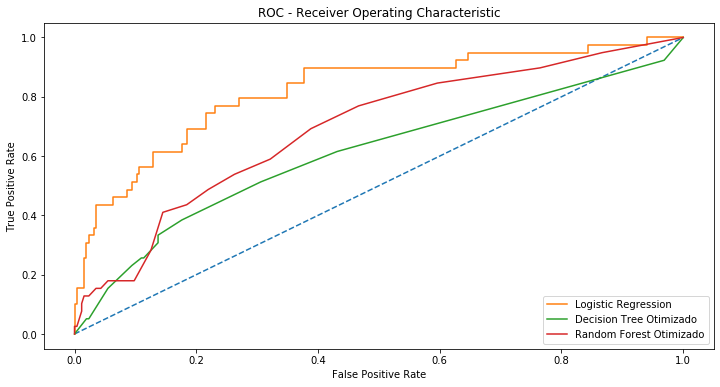

In [172]:
plt.figure(figsize=(12,6))
plt.plot([0,1], [0,1], linestyle="--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.plot(dt_opt_fpr, dt_opt_tpr, label = "Decision Tree Otimizado")
plt.plot(rf_opt_fpr, rf_opt_tpr, label = "Random Forest Otimizado")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - Receiver Operating Characteristic")
plt.legend(loc="lower right")

## 6 Conclusões

#### No código abaixo indentificamos e classificamos por ordem decrescente os 10 principais indicadores usados pelo Random Forest para a previsão. 

In [173]:
importances = rf_opt.feature_importances_
df_coeff = pd.DataFrame(columns = ['Feature', 'Coefficient'])
for i in range(67):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_coeff.loc[i] = (feat,coeff)
df_coeff.sort_values(by='Coefficient', ascending =False, inplace=True)
df_coeff = df_coeff.reset_index(drop=True)
df_coeff.head(10)

,Feature,Coefficient
0,MonthlyIncome,0.113750
1,OverTime_Yes,0.082986
2,DailyRate,0.064356
3,Age,0.063970
4,TotalWorkingYears,0.053006
5,MonthlyRate,0.051656
6,DistanceFromHome,0.049443
7,HourlyRate,0.041188
8,MaritalStatus_Single,0.035383
9,YearsAtCompany,0.033538


Na tabela acima vemos os principais estimadores considerados no modelo do Random Forest e podemos obter bons insights para onde atuar com intuito de minimizar custo de substituição de funcionários:

. Monthly Income: pessoas com maiores salários são menos propensas a deixa a companhia;

. OverTime: correlação positiva entre overtime e demissão - mais exposição a horas extras aumenta probabilidade de demissão;

. Distância de casa: também se mostrou um atributo importante. Esse determinante atua diretamente na qualidade de vida do funcionário, reduzindo seu tempo disponível e aumentando bastante o custo de oportunidade de utilidade marginal do lazer.

. Age / Total Working years: empregados mais novos e em funções mais baixas possuem maior índice de demissão;


Regressão Logística se apresentou como o melhor modelo.

Decision Tree e Random Forest apresentaram overfitting, fucnionando bem em treino e performando mal em teste.

Modelo desbalanceado, apresenta viés para previsão de "No Attrition": elevado número de "False Positive" na Matriz de confusão dos diversos modelos.

#### Qualidade do Modelo?
Analisando friamente a capacidade preditiva do modelo apresentado, talvez possamos considerá-lo fraco, com baixa capacidade preditiva da variável de interesse. As métricas de performance do modelo são influenciadas positivamente por ser um modelo desbalanceado, apresentanto 84% de observações "0" e 16% de observações "1". Mesmo no melhor algoritmo um percentual bem grande "False Negative", ou seja o modelo considera erroneamente que indivíduo não sairá.

Porém...
Modelo Logísitico: Matriz de confusão demonstra 41% de previsão de True Positive. Apesar de não ser realmente um bom resultado, apresenta grande melhora de capacidade preditiva em relação ao percentual de "Attrition" que é de 16%.

O objetivo principal não é saber exatamente quem vai pedir demissão e sim obter informações úteis sobre os principais determinantes da demissão  de modo a desenvolver uma política de retenção mais eficiente.

Nesse contexto o modelo pode contribuir bastante a partir da análise de dados desenvolvida. Pode-se ainda contribuir reforçando e traçando um paralelo com pesquisa.

#### Em suma
Mesmo se tecnicamente as métricas de performance do modelo não estiverem elevadas, o modelo pode ser muito útil e importante para definição de rota e desenvolvimento da política de renteção de forma mais embasada e direcionada, contribuindo muito para maior eficiência e assertividade na implantação.
